# Gnod case study: Top 100 songs recommender

In [2]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import random
from time import sleep
import matplotlib.pyplot as plt

## Lab 6.1: Scraping top 100 chart from popvortex.com and converting to dataframe

In [18]:
url = "https://www.popvortex.com/music/charts/top-100-songs.php"

In [19]:
response = requests.get(url)
response.status_code

200

In [20]:
soup = BeautifulSoup(response.content, "html.parser")

In [ ]:
print(soup.prettify())

In [ ]:
# Selector script that we want to parse

#chart-position-1 > div.chart-content.col-xs-12.col-sm-8 > p > cite

#chart-position-1 > div.chart-content.col-xs-12.col-sm-8 > ul > li:nth-child(1) > a

In [ ]:
soup.select("cite.title")
soup.select('em.artist')
soup.select('p.chart-position')

In [ ]:
soup.select('cite.title')[0].get_text()

In [ ]:
soup.select('em.artist')[0].get_text()


In [ ]:
soup.select('p.chart-position')[0].get_text()

In [ ]:
soup.select('#chart-position-1 > div.chart-content.col-xs-12.col-sm-8 > ul > li:nth-child(1) > a')[0].get_text()

In [ ]:
soup.select('#div.chart-content.col-xs-12.col-sm-8 > ul')

In [ ]:
# Working on getting the Genre from popvortex but its more difficult so sticking with the three for now.

# genre = []

# for g in soup.select("li"):
#     link = soup.get("href")
#     print(link)
#     if link is not None:
#         if (("/music" not in link) & 
#             ("/charts" not in link)):
#             genre.append(soup["href"])

In [21]:
#initialize empty lists
title = []
artist = []
rank = []
genre = []

# Number of iterations
num_iter = len(soup.select("cite.title"))

# Setting up what to iterate for each empty list
t_list = soup.select("cite.title")
a_list = soup.select("em.artist")
chart_rank = soup.select('p.chart-position')
gen = soup.select('#chart-position-1 > div.chart-content.col-xs-12.col-sm-8 > ul > li:nth-child(1) > a')

# iterate through the result set and retrive all the data
for i in range(num_iter):
    title.append(t_list[i].get_text())
    artist.append(a_list[i].get_text())
    rank.append(chart_rank[i].get_text())
    genre.append(gen[0])

# Checking results
# print(title)
# print(artist)
# print(rank)
# print(genre)

In [22]:
# Converting our lists into a dataframe

top_100 = pd.DataFrame({"rank":rank,
                        "title":title,
                       "artist":artist,
                       "genre":genre
                      })

In [ ]:
# We now see 100 rows with rank, title and artist information (note: not indexed to rank)

# Note: We are still working on making the genre column correct...

top_100

In [ ]:
# Recommendations (for a random song) based on user input

print('Welcome to Gnod song recommender!')
print('Enter the name of your favorite song to recieve a recommendation:') 

str(input())

rand_idx = random.randrange(len(top_100['title']))
random_rec = title[rand_idx]

print('Based on your input, we recommend: ' + random_rec)

## Lab 6.2: Scraping multiple sheets

In [23]:
url2 = "https://www.popvortex.com/music/france/top-songs.php"

In [24]:
response2 = requests.get(url2)

soup2 = BeautifulSoup(response2.content, "html.parser")

In [25]:
# Expanding the sample of songs

#initialize empty lists
title2 = []
artist2 = []

# Number of iterations
num_iter2 = len(soup2.select("cite.title"))

# Setting up what to iterate for each empty list
t_list2 = soup2.select("cite.title")
a_list2 = soup2.select("em.artist")

# iterate through the result set and retrive all the data
for i in range(num_iter2):
    title2.append(t_list2[i].get_text())
    artist2.append(a_list2[i].get_text())

In [26]:
top_100_france = pd.DataFrame({"title":title,
                       "artist":artist,
                      })

In [27]:
songs = top_100.copy()

In [28]:
songs = songs.drop(['rank', 'genre'], axis=1)

In [29]:
# Concatenating the top 100 list from the US with that of France

songs_list = pd.concat([songs, top_100_france], axis=0).reset_index(drop=True)

songs_list

,title,artist
0,Unholy,Sam Smith & Kim Petras
1,Everywhere,Fleetwood Mac
2,EDGING,blink-182
3,Sheeple,Tom MacDonald
4,I'm Good (Blue),David Guetta & Bebe Rexha
...,...,...
195,No Se Va (En Vivo),Grupo Frontera
196,What He Didn't Do,Carly Pearce
197,First Class,Jack Harlow
198,Y'all Life,Walker Hayes


In [30]:
# Removing duplicates (looks like 17 rows removed)

songs_list.drop_duplicates()

,title,artist
0,Unholy,Sam Smith & Kim Petras
1,Everywhere,Fleetwood Mac
2,EDGING,blink-182
3,Sheeple,Tom MacDonald
4,I'm Good (Blue),David Guetta & Bebe Rexha
...,...,...
95,No Se Va (En Vivo),Grupo Frontera
96,What He Didn't Do,Carly Pearce
97,First Class,Jack Harlow
98,Y'all Life,Walker Hayes


## Same operation as above, but using a function

In [ ]:
def scraper(url):

    response3 = requests.get(url)
    soup3 = BeautifulSoup(response3.content, "html.parser")

    titles = []
    artists = []

    num_iters = len(soup3.select("cite.title"))

    t_lists = soup3.select("cite.title")
    a_lists = soup3.select("em.artist")

    for i in range(num_iters):
        titles.append(t_lists[i].get_text())
        artists.append(a_lists[i].get_text())
    
    test = pd.DataFrame({"title":titles,
                       "artist":artists})
    return test

In [ ]:
urls1 = 'https://www.popvortex.com/music/france/top-songs.php'
urls2 = 'https://www.popvortex.com/music/charts/top-100-songs.php'

france_100 = scraper(urls1)
us_100 = scraper(urls2)

In [ ]:
# We now have a song list of 200 songs. And we can repeat for other song lists from the website

songs_list = pd.concat([france_100, us_100], axis=0).reset_index(drop=True)

songs_list

In [ ]:
songs_list.drop_duplicates()

In [ ]:
# Prepping our list of song titles so it can work in the below if / else statement:

my_list = songs_list['title']

my_list_lower = list(pd.Series(my_list).str.lower()) # convert to lower so the capitalizations don't mess up the string match

my_list_lower

In [540]:
# UPDATE: Song recommender that parses our existing song list to match user input

print('Welcome to Gnod song recommender!\n')
sleep(1.5)
print('Enter the name of your favorite song to recieve a recommendation:\n') 

user_input = str(input()).lower() # So that the capitalizations don't mess up the string match

random_rec = np.random.choice(my_list_lower)

if user_input in my_list_lower:
    print('Based on your input, we recommend: ' + random_rec)
else:
    print('Sorry. We cannot make a recommendation :(')

Welcome to Gnod song recommender!

Enter the name of your favorite song to recieve a recommendation:

Based on your input, we recommend: despechá


## Using Spotify API to improve the recommendation tool

In [ ]:
# Using SpotiPy to navigate the Spotify APIs
# Start with credential authorization

In [33]:
# !pip install spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [ ]:
spotify_key = open("spotify_key.txt","r")
string = spotify_key.read()
string
string.split('\n')

In [37]:
spotify_key_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        spotify_key_dict[line.split(':')[0]]=line.split(':')[1]

In [ ]:
spotify_key_dict

In [38]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=spotify_key_dict['cid'],
                                                           client_secret=spotify_key_dict['csecret']))

In [ ]:
# Query for the tracks data in the largest spotify playlist (10k songs)

In [135]:
playlist = sp.user_playlist_tracks("spotify", "5S8SJdl1BDc0ugpkEvFsIL") 

In [136]:
playlist["total"] 

10000

In [137]:
len(playlist["items"])

100

In [97]:
# from random import randint
# from time import sleep

# def get_playlist_tracks(playlist_id):
#     results = sp.user_playlist_tracks("spotify",playlist_id)
#     tracks = results['items']
#     while results['next']!=None:
#         results = sp.next(results)
#         tracks = tracks + results['items']
#         sleep(randint(1))
#     return tracks

In [98]:
all_tracks = get_playlist_tracks("5S8SJdl1BDc0ugpkEvFsIL")
len(all_tracks)

10000

In [ ]:
all_tracks

In [309]:
# Making a checkpoint so we don't have to run the code for all_tracks again...

all_tracks_csv = pd.DataFrame(all_tracks)

all_tracks_csv.to_csv('all_tracks.csv', index=False)

In [139]:
# Functions from our lecture today in case we need them later (we didn't)...

def flatten(input_list):
    return [item for sublist in input_list for item in sublist]

def get_name_artists_from_track(track):
    return [(track["name"], artist["name"]) for artist in track["artists"]]

def get_name_artists_from_list(tracks):
    return flatten(list(map(get_name_artists_from_track, tracks['items'])))

def get_name_artist_from_playlist_item(playlist_item):
    return get_name_artists_from_track(playlist_item['track'])

def get_name_artists_from_playlist(input_playlist):
    return flatten(list(map(get_name_artist_from_playlist_item,input_playlist["items"])))

In [218]:
# Looking at how to navigate this beast

all_tracks[0]['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [305]:
# Query for track names

all_tracks[1]['track']['name']

'Life Changes'

In [196]:
# Query for uri code names

all_tracks[1]['track']['uri'].split(':')

['spotify', 'track', '4Vxu50qVrQcycjRyJQaZLC']

In [395]:
# For loops to filter out artist names, uri, track and other tags of interest for the tool

artists = []
feature = []
feature_2 = []

for a in range(len(all_tracks)): 
    insert = all_tracks[a]['track']['artists'][0]['name'] 
    artists.append(insert)
    if len(all_tracks[a]['track']['artists']) > 1:
        feature.append(all_tracks[a]['track']['artists'][1]['name'])
    if len(all_tracks[a]['track']['artists']) > 2:
        feature_2.append(all_tracks[a]['track']['artists'][2]['name'])

In [ ]:
# Getting audio features out

In [197]:
uri = []

for a in range(len(all_tracks)):
    insert = all_tracks[a]['track']['uri'] 
    uri.append(insert)

In [394]:
track = []

for a in range(len(all_tracks)):
    adding = all_tracks[a]['track']['name']
    track.append(adding)

In [ ]:
# for i in range(len(uri)):
#     squish_uri = sp.audio_features(uri[i])

In [365]:
def features(tracks):
    
    song_features = {}
    
    for i in range(len(uri)):
        song_features[tracks[i]['track']['id']] = sp.audio_features(tracks[i]["track"]["uri"])
    
    return song_features

In [ ]:
uri_full = features(all_tracks)

In [427]:
def flatten_dict(data, col_list):
    for column in col_list:
        flattened = pd.DataFrame(dict(data[column])).transpose()
        columns = [str(col) for col in flattened.columns]
        flattened.columns = [column + '_' + colname for colname in columns]
        data = pd.concat([data, flattened], axis=1)
        data = data.drop(column, axis=1)
    return data

In [256]:
cols = ['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'duration_ms',
 'time_signature']

In [ ]:
dict(uri_full)
pd.DataFrame(dict(uri_full))
uri_full = pd.DataFrame(dict(uri_full)).transpose()

uri_full

In [ ]:
uri_full.rename(columns = {0:'audio_features'}, inplace = True)

uri_full = uri_full.reset_index(drop=True)

uri_full

In [430]:
uri_df_final = flatten_dict(uri_full, ['audio_features'])

In [ ]:
uri_df_final

In [432]:
# Looking at what columns we can drop from the dataset

uri_df_final.value_counts('audio_features_type')

audio_features_type
audio_features    9944
dtype: int64

In [433]:
# Dropping five columns we don't need from our audio_features

uri_df_final = uri_df_final.drop(['audio_features_type', 'audio_features_id',	'audio_features_uri',	
'audio_features_track_href', 'audio_features_analysis_url'], axis=1)

In [416]:
for_concat = pd.DataFrame({"artist":artists,
                          "track":track
                        })

In [434]:
uri_df_final.reset_index(drop=True, inplace=True)
for_concat.reset_index(drop=True, inplace=True)

In [435]:
gnod_songs = pd.concat([for_concat, uri_df_final], axis=1)

In [ ]:
gnod_songs

In [437]:
gnod_songs.isna().sum()

artist                              0
track                               0
audio_features_danceability        56
audio_features_energy              56
audio_features_key                 56
audio_features_loudness            56
audio_features_mode                56
audio_features_speechiness         56
audio_features_acousticness        56
audio_features_instrumentalness    56
audio_features_liveness            56
audio_features_valence             56
audio_features_tempo               56
audio_features_duration_ms         56
audio_features_time_signature      56
dtype: int64

In [ ]:
# We thought about appending the feature artists to the df but it would not work in our clustering unless feature: y/n

# gnod_songs = gnod_songs.append(pd.DataFrame(feature, columns=['feature_artist']), ignore_index=True)

In [423]:
# gnod_songs.value_counts('feature_artist') - 1/10 of songs have a feature artist

feature_artist
Justin Bieber                15
London Symphony Orchestra    13
Drake                        12
Nicki Minaj                  11
Rihanna                      10
                             ..
Jaren Johnston                1
Jasmine Ash                   1
Jason Aldean                  1
Jason Walker                  1
Lazz                          1
Length: 1044, dtype: int64

In [438]:
# Dropping null values - only 56 where audio features were missing...

gnod_songs = gnod_songs.dropna()

In [439]:
# Confirming there are no null values left

gnod_songs.isna().sum()

artist                             0
track                              0
audio_features_danceability        0
audio_features_energy              0
audio_features_key                 0
audio_features_loudness            0
audio_features_mode                0
audio_features_speechiness         0
audio_features_acousticness        0
audio_features_instrumentalness    0
audio_features_liveness            0
audio_features_valence             0
audio_features_tempo               0
audio_features_duration_ms         0
audio_features_time_signature      0
dtype: int64

In [ ]:
gnod_songs

In [441]:
# final dataframe to csv checkpoint

gnod_songs.to_csv('gnod_songs.csv', index=False)

## Clustering (using k-means)

In [1]:
# K-means clustering on our dataframe

from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [4]:
gnod_songs = pd.read_csv('gnod_songs.csv')

In [5]:
X_songs = gnod_songs.drop(['artist', 'track'], axis=1)

In [6]:
X_prep = StandardScaler().fit_transform(X_songs)
pd.DataFrame(X_prep,columns=X_songs.columns).head()

,audio_features_danceability,audio_features_energy,audio_features_key,audio_features_loudness,audio_features_mode,audio_features_speechiness,audio_features_acousticness,audio_features_instrumentalness,audio_features_liveness,audio_features_valence,audio_features_tempo,audio_features_duration_ms,audio_features_time_signature
0,0.283739,0.565427,-0.899671,0.279158,0.727259,0.877677,-0.592032,-0.403138,-0.195119,-0.080821,1.401571,-0.203087,0.185143
1,0.717151,0.858514,0.494577,0.748519,0.727259,-0.159008,-0.476902,-0.403138,-0.908790,1.348875,-1.152776,-0.251831,0.185143
2,1.505719,0.672004,-1.178521,0.768338,0.727259,0.136997,-0.703725,-0.403138,-0.208118,0.638043,-0.479045,-0.154848,0.185143
3,0.337916,0.996175,1.052276,0.972839,0.727259,0.408892,-0.567975,-0.403138,0.922837,1.236427,-0.728245,-0.304451,0.185143
4,0.277720,-1.210854,-0.341972,-0.627583,0.727259,-0.292946,1.265507,-0.401253,-0.561704,-1.092854,-0.442908,-0.065330,0.185143


In [7]:
kmeans = KMeans(n_clusters=10, random_state=69)
kmeans.fit(X_prep)

KMeans(n_clusters=10, random_state=69)

In [8]:
clusters = kmeans.predict(X_prep)

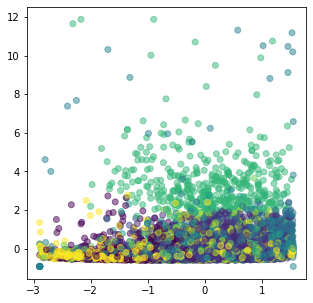

In [9]:
# Just testing a visualization to understand what we are doing when we cluster.

plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 1], X_prep[:, 5], c=clusters, alpha=0.5)
plt.show()

In [10]:
# Looking at the fitted and predicted cluster values and their frequency by song

pd.Series(clusters).value_counts().sort_index()

0    1281
1    2070
2    1770
3    1314
4     101
5     493
6     425
7     397
8    1544
9     549
dtype: int64

In [11]:
# With k = 10, the intertia scores are very close. I think this is a good n.

kmeans.inertia_ 

66719.00077530679

In [12]:
kmeans = KMeans(n_clusters=10,
                init="random",
                n_init=100,
                max_iter=10,
                tol=0,
                random_state=69)
kmeans.fit(X_prep)
print(kmeans.inertia_)

66746.50923769764


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

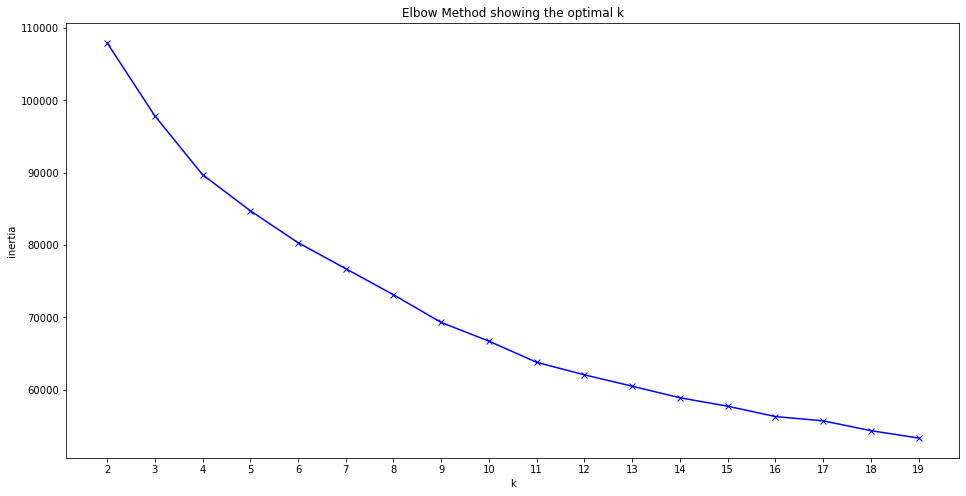

In [452]:
# Checking optimal inertia to k clusters ratio. I chose k=10

K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=69)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

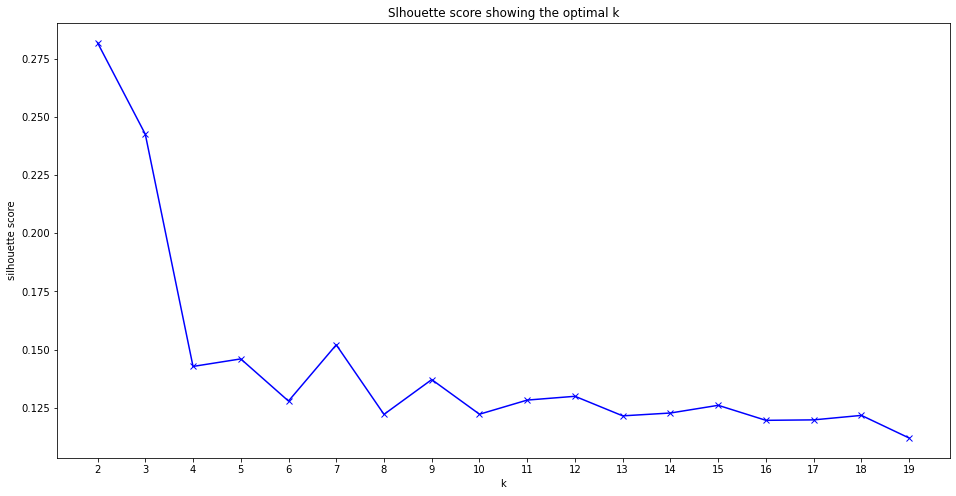

In [453]:
# Silhouette score. I chose k=10

K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=69)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))

plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

In [13]:
# Add the cluster column assigned to each song in the playlist

gnod_songs['cluster'] = kmeans.fit_predict(X_prep)

In [ ]:
# Success: New column for 'cluster' added

gnod_songs 

In [14]:
gnod_songs['cluster'].value_counts(sort=True)

3    2067
5    1685
1    1678
8    1278
2    1259
0     546
4     504
6     425
9     402
7     100
Name: cluster, dtype: int64

(array([ 546., 1678., 1259., 2067.,  504., 1685.,  425.,  100., 1680.]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <BarContainer object of 9 artists>)

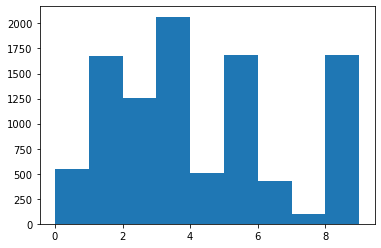

In [15]:
# Visualizing the frequency histogram of clusters for the 10 clusters

plt.hist(gnod_songs['cluster'], bins=9)

In [ ]:
# Not clustering with the Kaggle dataset yet. Should I do that?

## Updated recommendation tool (TBD)

In [ ]:
# 2. Assemble the project pipeline:
# When the user inputs a song, you should be able to:
# - receive an input song from a user. let’s imagine it’s Bohemian Rhapsody
# - check if Bohemian Rhapsody is hot. it’s not, so...
# - send “Bohemian Rhapsody” to the Spotify API and get its audio features. store them in a variable called, for example, song_audio_features
# - scale the audio features using song_scaled = scaler.transform(song_audio_features) (this is the scaler we created above!)
# - get the cluster of the song, using kmeans.predict(song_scaled) (this is the kmeans model we created above!). Let’s imagine it’s cluster 3.
# - rom your dataframe of collected songs X , get a song that belongs to cluster 3. Let’s imagine it’s Stairway to Heaven.
# - print Stairway to Heaven: this is your recommendation!

In [44]:
def song_recommender(input):
    
    # check if it is inside top_hits
    if input in my_list_lower:
        random_rec = np.random.choice(my_list_lower)
        # if it is -> recommend another top_hits
        return print('Based on your input, we recommend: ' + random_rec)

    # if it's not in our top 200 list, we need to search in Spotify  
    else:
        credentials = open("spotify_key.txt","r")
        string = credentials.read()
        secrets_dict={}                            
        for line in string.split('\n'):
            secrets_dict[line.split(':')[0]]=line.split(':')[1]

        sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['cid'],client_secret=secrets_dict['csecret']))

    # getting the info of the song from Spotify
        results = sp.search(q=input, type='track', limit=1)

    # get the title-artist-uri
        track_name = [results['tracks']['items'][0]['name']]
        artist = [results['tracks']['items'][0]['artists'][0]['name']]
        uri = results['tracks']['items'][0]['uri']

    # extract audio features
        audio_features_dict = sp.audio_features(uri)
        audio_features_df = pd.DataFrame.from_dict(audio_features_dict) 

        # creating df with the info of this song
        input_artist_track = pd.DataFrame({'song_title':track_name,'artist':artist})
        df = pd.concat([input_artist_track, audio_features_df], axis=1)

        # separate the numericals to scale
        df_num = df.select_dtypes(np.number)

        # scale the numerical values 
        df_scaled = StandardScaler().fit_transform(df_num)

    # classify them into one of the clusters
        df_cluster = kmeans.predict(df_scaled)

    # recommend another song from that cluster
        # creating a dataframe with only the songs of this cluster:
        input_cluster = gnod_songs[gnod_songs['cluster']==df_cluster[0]]
        
        #choosing one random song from this group:
        return print('Based on your input, we recommend: ' + random.choice(input_cluster['track'].values)) 
        
# TO DO: Need to add artist name since some song names have multiple artists + 'by'

In [48]:
 # Ask a user for an input

print('Welcome to Gnod song recommender!\n'
'Enter the name of your favorite song to recieve a recommendation:\n')

user_input = str(input()).lower()

# Initiate recommendation tool
song_recommender(user_input) # My input here was 'Pretty Fly (For A White Guy)' and I recieved 'Night Train'

# TO DO: Need to make a message for 'song not found in database'

Welcome to Gnod song recommender!
Enter the name of your favorite song to recieve a recommendation:

Based on your input, we recommend: Night Train


In [558]:
# Testing whether 'Pretty Fly (For A White Guy)' and 'Night Train' cluster ids match

# Both from cluster 5 so the tool is technically a success! Although these songs are in no way similar beyond audio features...

gnod_songs.head()

,artist,track,audio_features_danceability,audio_features_energy,audio_features_key,audio_features_loudness,audio_features_mode,audio_features_speechiness,audio_features_acousticness,audio_features_instrumentalness,audio_features_liveness,audio_features_valence,audio_features_tempo,audio_features_duration_ms,audio_features_time_signature,cluster
0,Taylor Swift,...Ready For It?,0.615,0.779,2,-6.454,1,0.135,0.0665,0,0.155,0.453,160.0,208198,4,3
1,Thomas Rhett,Life Changes,0.687,0.845,7,-4.37,1,0.0576,0.1,0,0.0452,0.809,87.972,190227,4,2
2,Bruno Mars,24K Magic,0.818,0.803,1,-4.282,1,0.0797,0.034,0,0.153,0.632,106.97,225983,4,8
3,Ed Sheeran,Galway Girl,0.624,0.876,9,-3.374,1,0.1,0.0735,0,0.327,0.781,99.943,170827,4,2
4,Ed Sheeran,Photograph,0.614,0.379,4,-10.48,1,0.0476,0.607,0.000464,0.0986,0.201,107.989,258987,4,0


In [47]:
gnod_songs.loc[gnod_songs['track'] == 'Pretty Fly (For A White Guy)']

,artist,track,audio_features_danceability,audio_features_energy,audio_features_key,audio_features_loudness,audio_features_mode,audio_features_speechiness,audio_features_acousticness,audio_features_instrumentalness,audio_features_liveness,audio_features_valence,audio_features_tempo,audio_features_duration_ms,audio_features_time_signature,cluster
6632,The Offspring,Pretty Fly (For A White Guy),0.599,0.626,10,-6.688,1,0.0306,0.00999,0.000006,0.116,0.319,120.928,214760,4,5


In [49]:
gnod_songs.loc[gnod_songs['track'] == 'Night Train']

,artist,track,audio_features_danceability,audio_features_energy,audio_features_key,audio_features_loudness,audio_features_mode,audio_features_speechiness,audio_features_acousticness,audio_features_instrumentalness,audio_features_liveness,audio_features_valence,audio_features_tempo,audio_features_duration_ms,audio_features_time_signature,cluster
757,Jason Aldean,Night Train,0.549,0.866,6,-5.306,1,0.0476,0.0733,0.0,0.25,0.767,87.964,187400,4,5
